In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib
# from tqdm.notebook import tqdm

In [2]:
# 5. Load Data
def load_data(file_path, dataset):
    with h5py.File(file_path, 'r') as f:
        X = f[dataset][:]
    return X

In [3]:
# def process_data(X):
#     X_trans = X.transpose(1,0,2)
#     X_reshaped = X_trans.reshape(6, -1)
#     print(X_reshaped.shape)
#     return X_reshaped

In [3]:
def order_data(X, order):
    # Reshape for fitting: (samples * features, timesteps) → (20*6, 150)
    # X_reshaped = X.reshape(-1, X.shape[2])  

    # Fit scaler on entire dataset
    # scaler = StandardScaler()
    # X_standardized = scaler.fit_transform(X_reshaped)

    # Reshape back to (20, 6, 150)
    # X_standardized = X_standardized.reshape(X.shape[0], X.shape[1], X.shape[2])

    # Reorder using NumPy indexing
    X_reorderd = X[:, order, :]

    # Print shape to confirm it remains unchanged
    print("Original shape:", X.shape)
    print("Standardized and reordered shape:", X_reorderd.shape)
    return X_reorderd

In [4]:
X_real = load_data(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data.h5', 'data')
X_real_std = load_data(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data_std_normalized.h5', 'data')
X_syn = load_data(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\features_extraction\trial_12\reconstructed_data.h5', 'reconstructed_data')
X_real.shape, X_real_std.shape, X_syn.shape

((417840, 6, 150), (417840, 6, 150), (417840, 6, 150))

In [5]:
# X_syn = process_data(X_syn)
# X_real = process_data(X_real)
order = [1, 2, 3, 4, 5, 0]  # Acc_X, Acc_y, Acc_z, BvP, TEMP, EDA
real_data = order_data(X_real, order)
data = order_data(X_real_std, order)

Original shape: (417840, 6, 150)
Standardized and reordered shape: (417840, 6, 150)
Original shape: (417840, 6, 150)
Standardized and reordered shape: (417840, 6, 150)


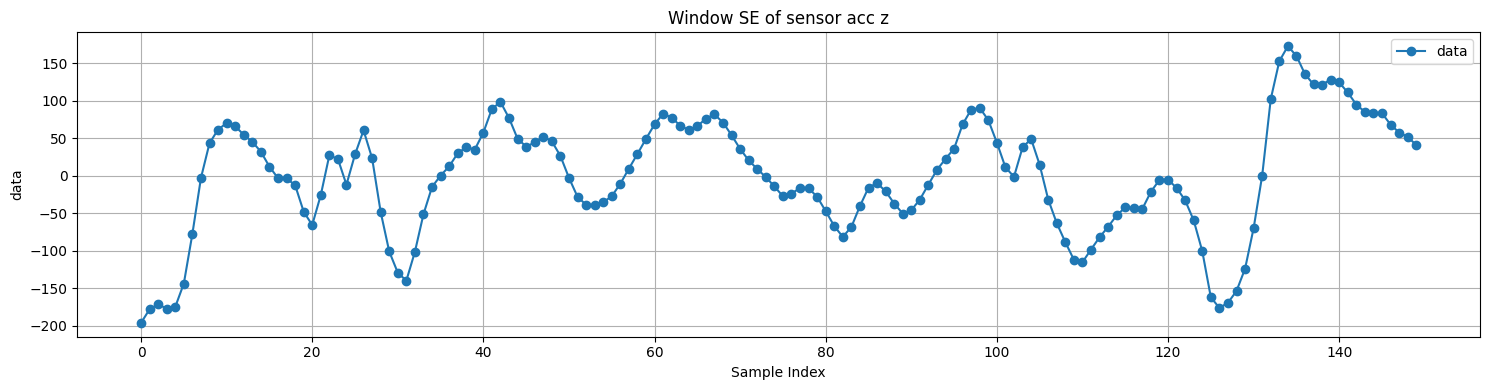

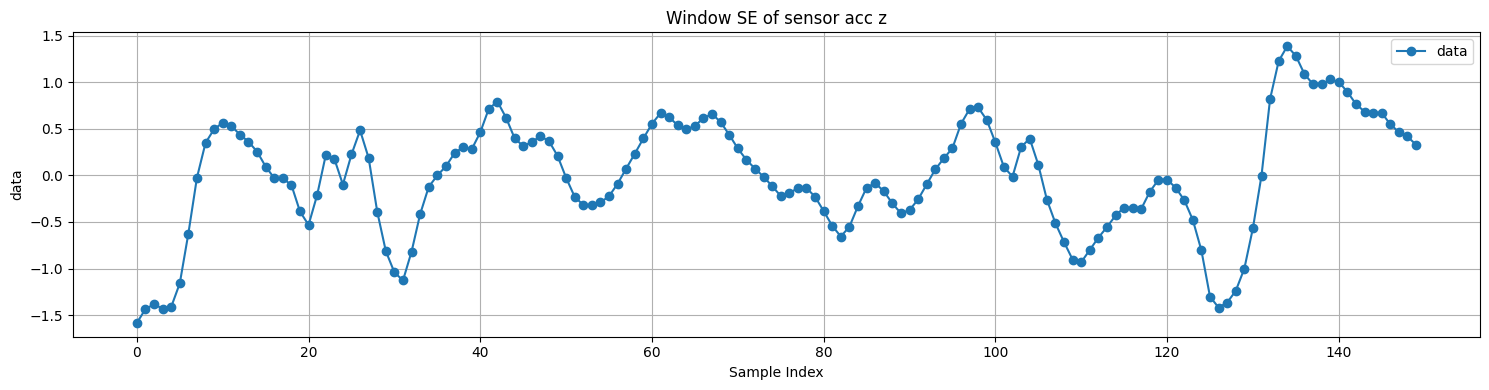

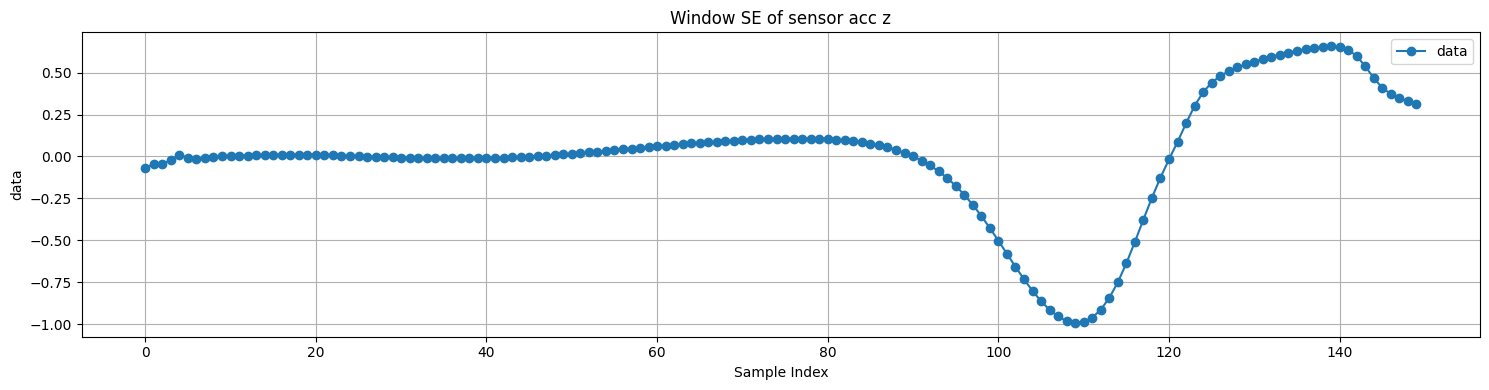

In [8]:
plt.figure(figsize=(15, 4))
plt.plot(real_data[10,3,:], marker='o', label="data")
# plt.xlim(0,150)
plt.title("Window SE of sensor acc z")
plt.xlabel("Sample Index")
plt.ylabel("data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(data[10,3,:], marker='o', label="data")
# plt.xlim(0,150)
plt.title("Window SE of sensor acc z")
plt.xlabel("Sample Index")
plt.ylabel("data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(X_syn[10,3,:], marker='o', label="data")
# plt.xlim(0,150)
plt.title("Window SE of sensor acc z")
plt.xlabel("Sample Index")
plt.ylabel("data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Try applying inverse scale

In [19]:
scalers = joblib.load(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\z_score_scalers_grouped.pkl')
scalers

{0: StandardScaler(),
 '1_2_3': StandardScaler(),
 4: StandardScaler(),
 5: StandardScaler()}

In [21]:
# Initialize list to store inverse-transformed chunks
inverse_list = []

# Channels 0-2 (grouped)
data_group = data[:, 0:3, :].reshape(-1, data.shape[-1])
orig_group = scalers["1_2_3"].inverse_transform(data_group)
inverse_list.append(orig_group.reshape(data.shape[0], 3, data.shape[2]))

# Channel 3
data_3 = data[:, 3, :].reshape(-1, data.shape[-1])
orig_3 = scalers[4].inverse_transform(data_3)
inverse_list.append(orig_3.reshape(data.shape[0], 1, data.shape[2]))

# Channel 4
data_4 = data[:, 4, :].reshape(-1, data.shape[-1])
orig_4 = scalers[5].inverse_transform(data_4)
inverse_list.append(orig_4.reshape(data.shape[0], 1, data.shape[2]))

# Channel 5
data_5 = data[:, 5, :].reshape(-1, data.shape[-1])
orig_5 = scalers[0].inverse_transform(data_5)
inverse_list.append(orig_5.reshape(data.shape[0], 1, data.shape[2]))

X_orig = np.concatenate(inverse_list, axis=1)

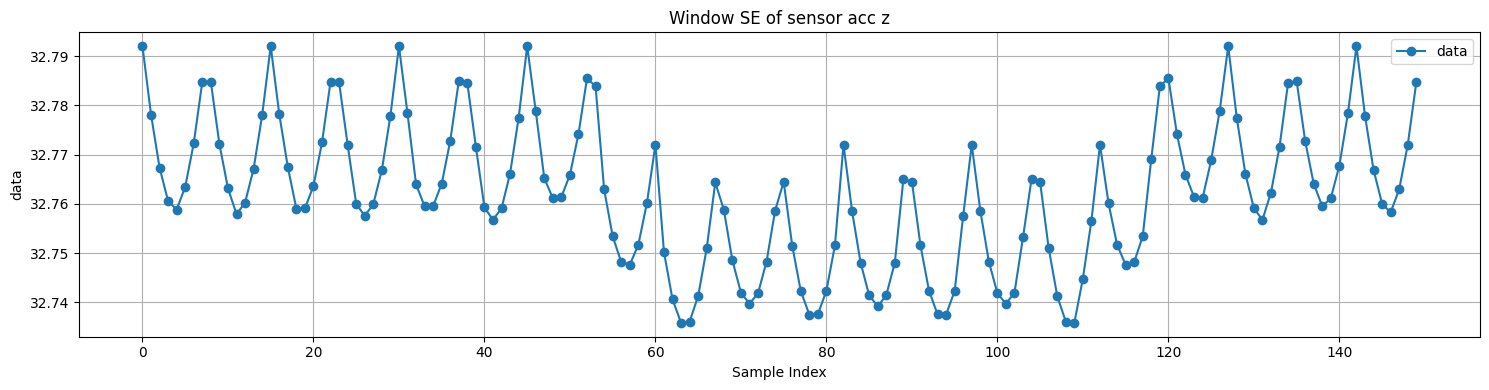

In [25]:
plt.figure(figsize=(15, 4))
plt.plot(X_orig[150,4,:], marker='o', label="data")
# plt.xlim(0,150)
plt.title("Window SE of sensor acc z")
plt.xlabel("Sample Index")
plt.ylabel("data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Apply inverse on reconstructed data

In [23]:
# Initialize list to store inverse-transformed chunks
inverse_list_reconstructed = []

# Channels 0-2 (grouped)
data_group = X_syn[:, 0:3, :].reshape(-1, X_syn.shape[-1])
orig_group = scalers["1_2_3"].inverse_transform(data_group)
inverse_list_reconstructed.append(orig_group.reshape(X_syn.shape[0], 3, X_syn.shape[2]))

# Channel 3
data_3 = X_syn[:, 3, :].reshape(-1, X_syn.shape[-1])
orig_3 = scalers[4].inverse_transform(data_3)
inverse_list_reconstructed.append(orig_3.reshape(X_syn.shape[0], 1, X_syn.shape[2]))

# Channel 4
data_4 = X_syn[:, 4, :].reshape(-1, X_syn.shape[-1])
orig_4 = scalers[5].inverse_transform(data_4)
inverse_list_reconstructed.append(orig_4.reshape(X_syn.shape[0], 1, X_syn.shape[2]))

# Channel 5
data_5 = X_syn[:, 5, :].reshape(-1, X_syn.shape[-1])
orig_5 = scalers[0].inverse_transform(data_5)
inverse_list_reconstructed.append(orig_5.reshape(X_syn.shape[0], 1, X_syn.shape[2]))

X_syn_scale_inversed = np.concatenate(inverse_list_reconstructed, axis=1)

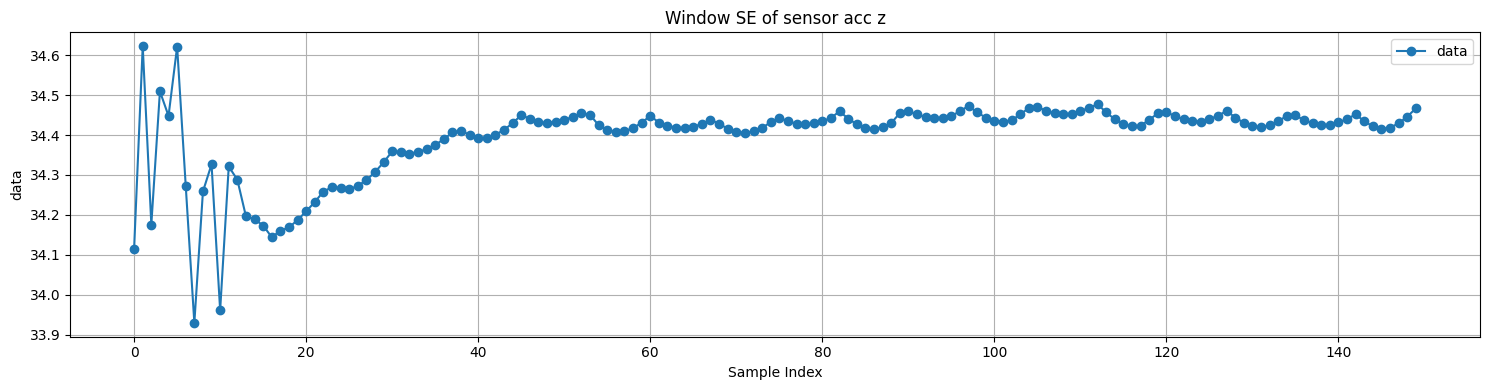

In [27]:
plt.figure(figsize=(15, 4))
plt.plot(X_syn_scale_inversed[150,4,:], marker='o', label="data")
# plt.xlim(0,150)
plt.title("Window SE of sensor acc z")
plt.xlabel("Sample Index")
plt.ylabel("data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Get the mean and std of the real data

In [6]:
real_mean = real_data.mean(axis=(0, 2))  # Shape (6,)
real_std = real_data.std(axis=(0, 2))  # Shape (6,)

real_mean, real_std

(array([-2.98284202e-01,  5.64602853e-02,  3.56441485e-01,  1.00086827e-03,
         3.32540150e+01,  3.99196099e-01]),
 array([  0.57776068,   0.47825542,   0.46416461, 123.97647382,
         12.45919966,   1.17700973]))

Save File

In [28]:
se = (real_data - X_syn_scale_inversed)**2
se.shape

(417840, 6, 150)

In [29]:
with h5py.File('squared_error_windows_inversed_scale.h5', 'w') as f:
    f.create_dataset('se', data=se)

In [ ]:
# se = (data - X_syn)**2
# se.shape

In [ ]:
# with h5py.File('squared_error_windows.h5', 'w') as f:
#     f.create_dataset('se', data=se)

Load File

In [7]:
with h5py.File('squared_error_windows_inversed_scale.h5', 'r') as f:
    squared_error = f['se'][:]
squared_error.shape

(417840, 6, 150)

In [ ]:
# def plot_sensor_boxplots(data, sensors=None, threshold=None, showfliers=False, ylim=None):
#     """
#     Plot 150 boxplots per specified sensor(s) with custom styling.

#     Parameters:
#     - data: np.ndarray, shape (num_sequences, 6, 150)
#     - sensors: int or list of ints or None
#         Sensor index(es) to plot (0-based). 
#         If None, plots all sensors.
#     - threshold: float or None, horizontal line for error threshold
#     - showfliers: bool, whether to show outliers
#     - ylim: tuple or None, y-axis limits; if None, autoscale is used
#     """
#     num_sensors = data.shape[1]
    
#     if sensors is None:
#         sensors_to_plot = range(num_sensors)
#     elif isinstance(sensors, int):
#         sensors_to_plot = [sensors]
#     else:
#         sensors_to_plot = sensors

#     for sensor_idx in sensors_to_plot:
#         if sensor_idx < 0 or sensor_idx >= num_sensors:
#             print(f"Warning: Sensor index {sensor_idx} out of range. Skipping.")
#             continue
        
#         sensor_data = data[:, sensor_idx, :]   # shape (num_sequences, 150)
#         data_for_boxplot = sensor_data.T       # shape (150, num_sequences)

#         plt.figure(figsize=(20, 6))
#         box = plt.boxplot(
#             data_for_boxplot,
#             patch_artist=True,
#             showmeans=True,
#             meanline=True,
#             boxprops=dict(facecolor='lightblue'),
#             medianprops=dict(color='red'),
#             meanprops=dict(color='green', linewidth=2),
#             showfliers=showfliers
#         )

#         if threshold is not None:
#             plt.axhline(y=threshold, color='orange', linestyle='--', label='Error Threshold')
#             plt.legend()

#         plt.title(f'Sensor {sensor_idx + 1} - Timewise Reconstruction Error (Boxplot)')
#         plt.xlabel('Time Point (Segment)')
#         plt.ylabel('Squared Error')
#         plt.grid(True, linestyle='--', alpha=0.5)
#         if ylim is not None:
#             plt.ylim(*ylim)
#         plt.tight_layout()
#         plt.show()


In [ ]:
# plot_sensor_boxplots(squared_error, sensors=0, showfliers=True)

In [ ]:
# def plot_mean_error_line(data, sensors=None):
#     """
#     Plot mean squared error per time point for specified sensor(s).
    
#     Parameters:
#     - data: np.ndarray, shape (num_sequences, 6, 150)
#     - sensors: int or list of ints or None (plot all if None)
#     """
#     num_sensors = data.shape[1]
    
#     if sensors is None:
#         sensors_to_plot = range(num_sensors)
#         sensors_name = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'TEMP', 'EDA']
#         colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
#     elif isinstance(sensors, int):
#         sensors_to_plot = [sensors]
#     else:
#         sensors_to_plot = sensors
    
#     plt.figure(figsize=(12, 6))
    
#     for sensor_idx in sensors_to_plot:
#         mean_per_time = np.mean(data[:, sensor_idx, :], axis=0)  # shape (150,)
#         # plt.plot(mean_per_time, label=f'Sensor {sensor_idx + 1}')
#         plt.plot(mean_per_time, color=colors[sensor_idx], label=f'Sensor {sensors_name[sensor_idx]} (mean ± std): {real_mean[sensor_idx]:.4e}±{real_std[sensor_idx]:.4f}')
    
#     plt.title('Mean Reconstruction Error per Time Point')
#     plt.xlabel('Time Point (Segment)')
#     plt.ylabel('Mean Squared Error')
#     plt.legend()
#     plt.grid(True, linestyle='--', alpha=0.5)
#     plt.tight_layout()
#     plt.savefig('MSE_per_datapoint_with_mean_std_inversed_scale.pdf', dpi=600, bbox_inches='tight')
#     plt.show()


In [11]:
def plot_mean_error_line(data, sensors=None):
    """
    Plot mean squared error per time point for specified sensor(s).

    Parameters:
    - data: np.ndarray, shape (num_sequences, 6, 150)
    - sensors: int or list of ints or None (plot all if None)
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Define sensor names and colors once
    sensors_name = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'TEMP', 'EDA']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    num_sensors = data.shape[1]

    # Determine which sensors to plot
    if sensors is None:
        sensors_to_plot = range(num_sensors)
    elif isinstance(sensors, int):
        sensors_to_plot = [sensors]
    else:
        sensors_to_plot = sensors

    plt.figure(figsize=(12, 6))

    for sensor_idx in sensors_to_plot:
        mean_per_time = np.mean(data[:, sensor_idx, :], axis=0)  # shape (150,)
        rmse = np.sqrt(mean_per_time)
        plt.plot(rmse,
                 color=colors[sensor_idx],
                 label=f'Sensor {sensors_name[sensor_idx]} (mean ± std): {real_mean[sensor_idx]:.4e}±{real_std[sensor_idx]:.4f}')

    plt.title('Root Mean Reconstruction Error per Time Point')
    plt.xlabel('Time Point (Segment)')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'RMSE_per_datapoint_{sensors_name[sensor_idx]}.pdf', dpi=600, bbox_inches='tight')
    plt.show()


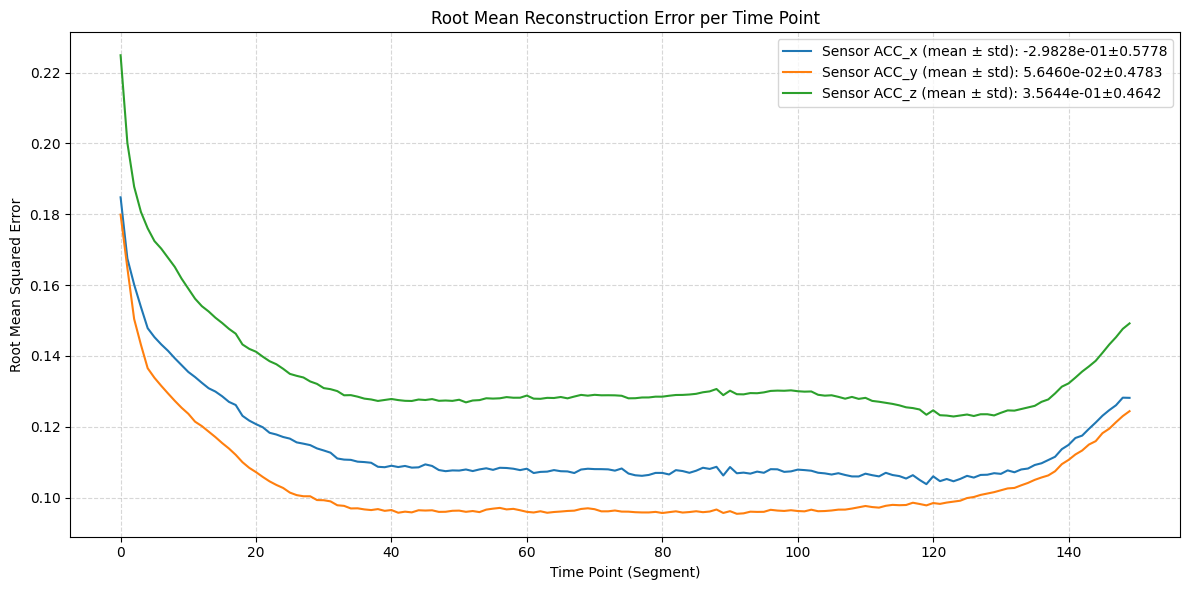

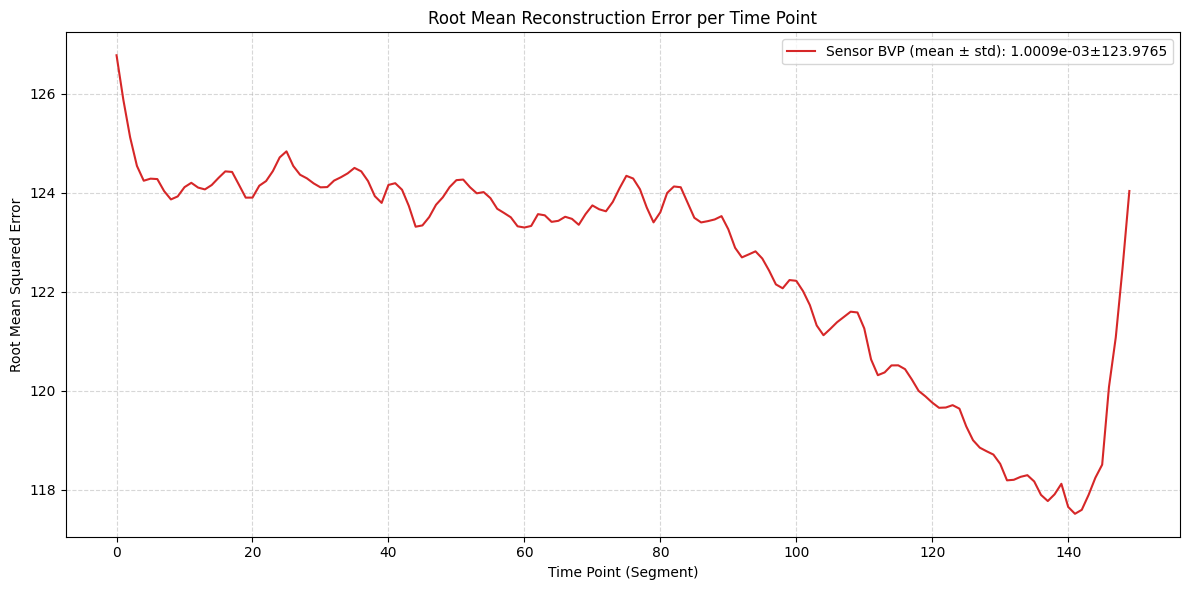

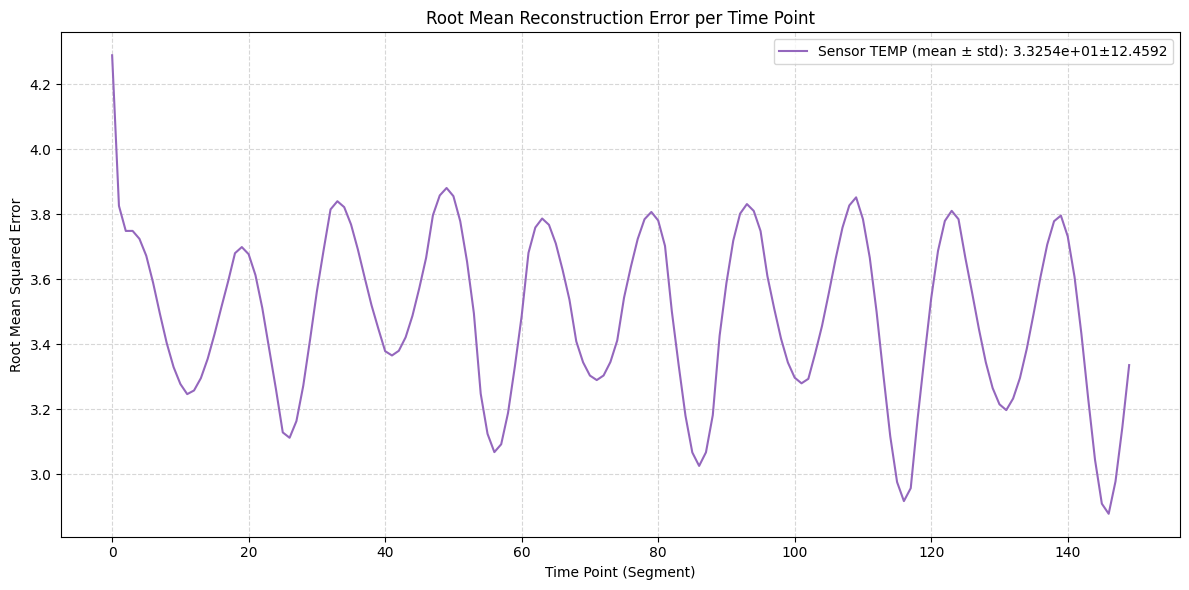

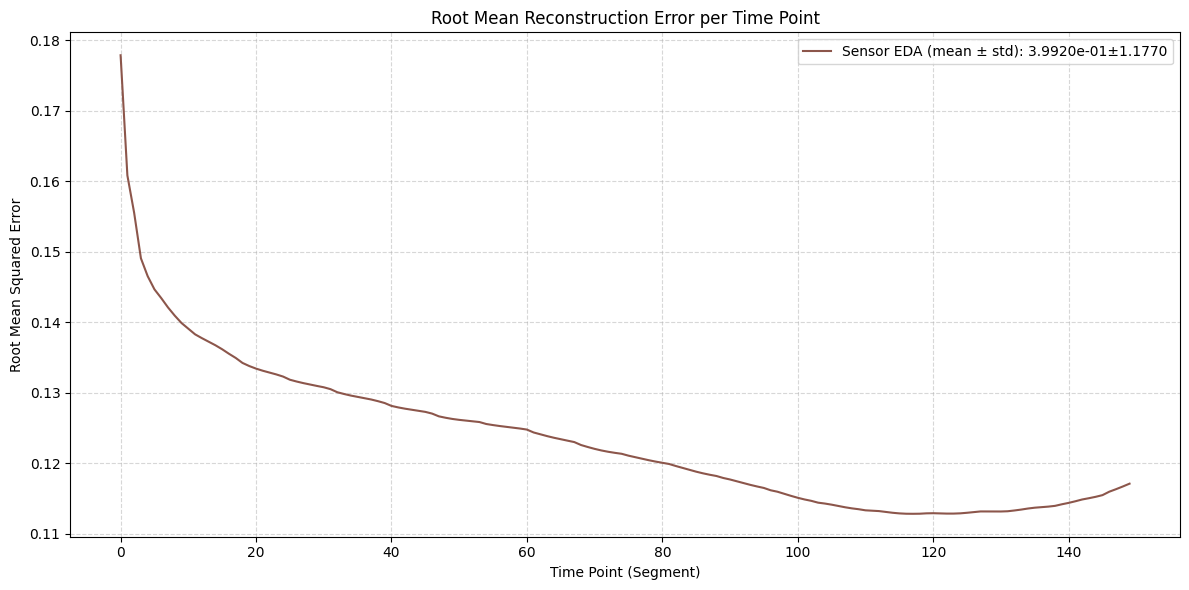

In [12]:
plot_mean_error_line(squared_error, sensors=[0,1,2])
plot_mean_error_line(squared_error, sensors=3)
plot_mean_error_line(squared_error, sensors=4)
plot_mean_error_line(squared_error, sensors=5)

In [ ]:
def plot_mean_error_line(data):
    """
    Plot RMSE per time point:
    - Top-left: ACC_x, ACC_y, ACC_z
    - Top-right: BVP
    - Bottom-left: TEMP
    - Bottom-right: EDA
    """

    import matplotlib.pyplot as plt
    import numpy as np

    sensors_name = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'TEMP', 'EDA']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    
    # Sensor groups
    acc_indices = [0, 1, 2]
    bvp_idx, temp_idx, eda_idx = 3, 4, 5

    title_fontsize, subtitle_fontsize, legend_fontsize, axes_fontsize = 16, 20, 12, 12

    # Compute RMSEs
    def compute_rmse(idx):
        mean_per_time = np.mean(data[:, idx, :], axis=0)
        rmse = np.sqrt(mean_per_time)
        return rmse

    # Set up figure
    fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex='col')
    axs = axs.flatten()

    # Plot 1: ACC_x, ACC_y, ACC_z
    for i in acc_indices:
        rmse = compute_rmse(i)
        axs[0].plot(rmse, label=f"{sensors_name[i]} (mean ± std): {real_mean[i]:.4e}±{real_std[i]:.4f}", color=colors[i])
    axs[0].set_title("Accelerometer (x, y, z) Sensors", fontsize=title_fontsize)
    axs[0].legend(fontsize=legend_fontsize)
    axs[0].set_ylabel("Root Mean Squared Error (RMSE)", fontsize=axes_fontsize)

    # Plot 2: BVP
    rmse = compute_rmse(bvp_idx)
    axs[1].plot(rmse, label=f"{sensors_name[bvp_idx]} (mean ± std): {real_mean[bvp_idx]:.4e}±{real_std[bvp_idx]:.4f}", color=colors[bvp_idx])
    axs[1].set_title("Blood Volume Pulse Sensor", fontsize=title_fontsize)
    axs[1].set_ylabel("")  # No y-label
    axs[1].tick_params(axis='y', labelleft=True)  # Keep y-tick values
    axs[1].legend(fontsize=legend_fontsize)

    # Plot 3: TEMP
    rmse = compute_rmse(temp_idx)
    axs[2].plot(rmse, label=f"{sensors_name[temp_idx]} (mean ± std): {real_mean[temp_idx]:.4e}±{real_std[temp_idx]:.4f}", color=colors[temp_idx])
    axs[2].set_title("Skin Temperature Sensor", fontsize=title_fontsize)
    axs[2].set_xlabel("Time Point (Segment)", fontsize=axes_fontsize)
    axs[2].set_ylabel("Root Mean Squared Error (RMSE)", fontsize=axes_fontsize)
    axs[2].legend(fontsize=legend_fontsize)

    # Plot 4: EDA
    rmse = compute_rmse(eda_idx)
    axs[3].plot(rmse, label=f"{sensors_name[eda_idx]} (mean ± std): {real_mean[eda_idx]:.4e}±{real_std[eda_idx]:.4f}", color=colors[eda_idx])
    axs[3].set_title("Electrodermal Activity Sensor", fontsize=title_fontsize)
    axs[3].set_xlabel("Time Point (Segment)", fontsize=axes_fontsize)
    axs[3].set_ylabel("")  # No y-label
    axs[3].tick_params(axis='y', labelleft=True)  # Keep y-tick values
    axs[3].legend(fontsize=legend_fontsize)

    # Main title
    fig.suptitle("Averaged Root Mean Reconstruction Error per Time Point", fontsize=subtitle_fontsize)

    # Styling
    for ax in axs:
        ax.grid(True, linestyle='--', alpha=0.5)

    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # # Save
    # fig.savefig("RMSE_overview.png", dpi=600, bbox_inches='tight')
    # fig.savefig("RMSE_overview.pdf", dpi=600, bbox_inches='tight')

    plt.show()


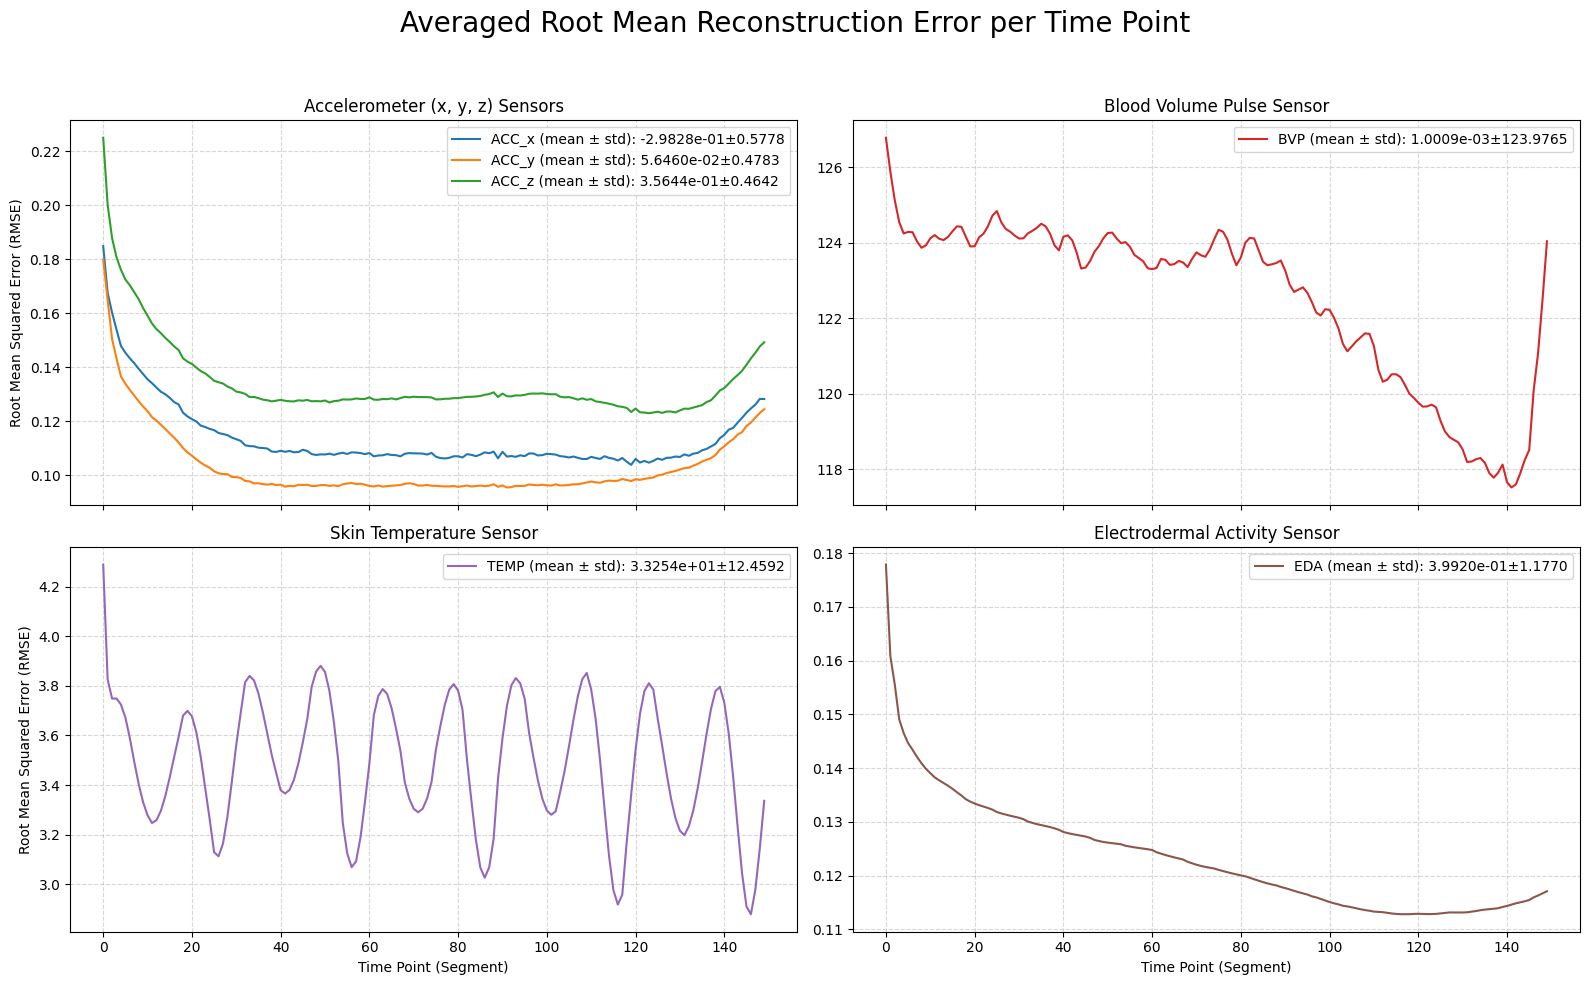

In [11]:
plot_mean_error_line(squared_error)

In [24]:
def plot_mean_error_line(data):
    """
    Plot RMSE per time point:
    - Top-left: ACC_x, ACC_y, ACC_z
    - Top-right: BVP
    - Bottom-left: TEMP
    - Bottom-right: EDA
    """

    import matplotlib.pyplot as plt
    import numpy as np

    sensors_name = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'TEMP', 'EDA']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    
    # Sensor groups
    acc_indices = [0, 1, 2]
    bvp_idx, temp_idx, eda_idx = 3, 4, 5

    # Compute RMSEs
    def compute_rmse(idx):
        mean_per_time = np.mean(data[:, idx, :], axis=0)
        rmse = np.sqrt(mean_per_time)
        return rmse

    # Set up figure
    fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex='col')
    axs = axs.flatten()

    # Plot 1: ACC_x, ACC_y, ACC_z
    for i in acc_indices:
        rmse = compute_rmse(i)
        axs[0].plot(rmse, label=f"{sensors_name[i]} (mean ± std): {real_mean[i]:.4e}±{real_std[i]:.4f}", color=colors[i])
    axs[0].set_title("Accelerometer (x, y, z) Sensors")
    axs[0].legend()
    axs[0].set_ylabel("Root Mean Squared Error (RMSE)")

    # Plot 2: BVP
    rmse = compute_rmse(bvp_idx)
    axs[1].plot(rmse, label=f"{sensors_name[bvp_idx]} (mean ± std): {real_mean[bvp_idx]:.4e}±{real_std[bvp_idx]:.4f}", color=colors[bvp_idx])
    axs[1].set_title("Blood Volume Pulse Sensor")
    axs[1].set_ylabel("")  # No y-label
    axs[1].tick_params(axis='y', labelleft=True)  # Keep y-tick values
    axs[1].legend()

    # Plot 3: TEMP
    rmse = compute_rmse(temp_idx)
    axs[2].plot(rmse, label=f"{sensors_name[temp_idx]} (mean ± std): {real_mean[temp_idx]:.4e}±{real_std[temp_idx]:.4f}", color=colors[temp_idx])
    axs[2].set_title("Skin Temperature Sensor")
    axs[2].set_xlabel("Time Point (Segment)")
    axs[2].set_ylabel("Root Mean Squared Error (RMSE)")
    axs[2].legend()

    # Plot 4: EDA
    rmse = compute_rmse(eda_idx)
    axs[3].plot(rmse, label=f"{sensors_name[eda_idx]} (mean ± std): {real_mean[eda_idx]:.4e}±{real_std[eda_idx]:.4f}", color=colors[eda_idx])
    axs[3].set_title("Electrodermal Activity Sensor")
    axs[3].set_xlabel("Time Point (Segment)")
    axs[3].set_ylabel("")  # No y-label
    axs[3].tick_params(axis='y', labelleft=True)  # Keep y-tick values
    axs[3].legend()

    # Main title
    fig.suptitle("Averaged Root Mean Reconstruction Error per Time Point", fontsize=16)

    # Styling
    for ax in axs:
        ax.grid(True, linestyle='--', alpha=0.5)

    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save
    fig.savefig("RMSE_overview.png", dpi=600, bbox_inches='tight')
    fig.savefig("RMSE_overview.pdf", dpi=600, bbox_inches='tight')

    plt.show()


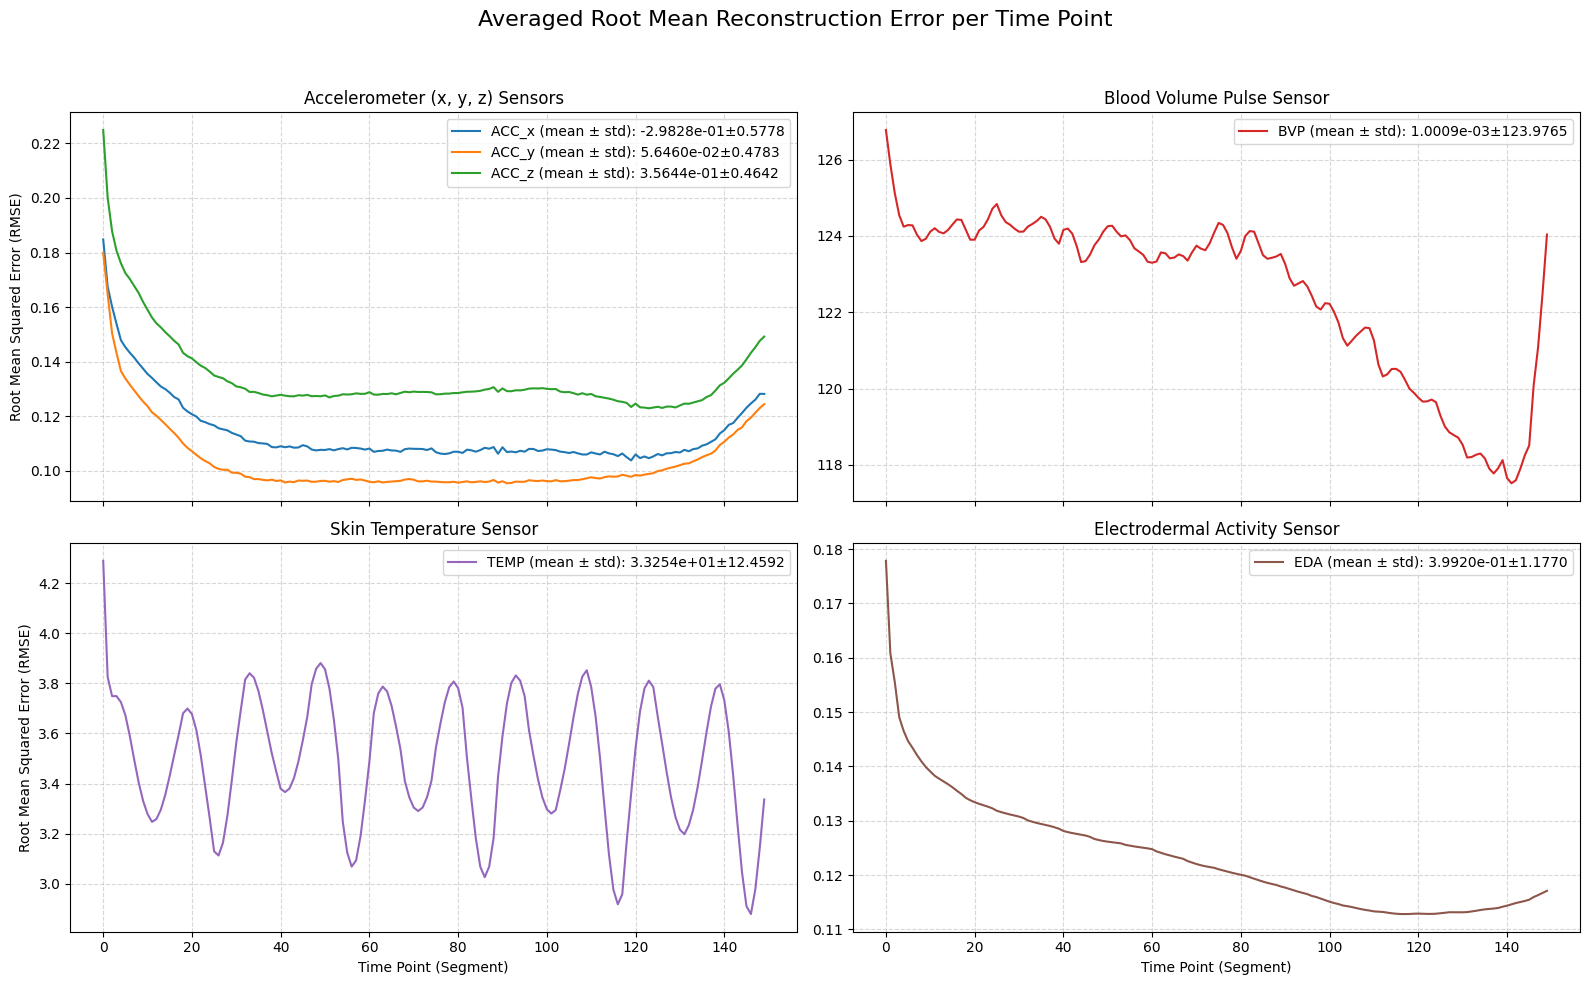

In [25]:
plot_mean_error_line(squared_error)

In [17]:
def plot_error_metric_line(data, sensors=None, metric='mean', percentile=None):
    """
    Plot a chosen metric per time point for specified sensor(s).

    Parameters:
    - data: np.ndarray, shape (num_sequences, 6, 150)
    - sensors: int or list of ints or None (plot all if None)
    - metric: str, one of
        ['mean', 'median', 'std', 'variance', 'min', 'max', 'iqr', 'percentile']
    - percentile: float in [0, 100], required if metric='percentile'
    """
    num_sensors = data.shape[1]

    if sensors is None:
        sensors_to_plot = range(num_sensors)
    elif isinstance(sensors, int):
        sensors_to_plot = [sensors]
    else:
        sensors_to_plot = sensors

    plt.figure(figsize=(12, 6))

    for sensor_idx in sensors_to_plot:
        sensor_data = data[:, sensor_idx, :]  # shape (num_sequences, 150)

        if metric == 'mean':
            y = np.mean(sensor_data, axis=0)
        elif metric == 'median':
            y = np.median(sensor_data, axis=0)
        elif metric == 'std':
            y = np.std(sensor_data, axis=0)
        elif metric == 'variance':
            y = np.var(sensor_data, axis=0)
        elif metric == 'min':
            y = np.min(sensor_data, axis=0)
        elif metric == 'max':
            y = np.max(sensor_data, axis=0)
        elif metric == 'iqr':
            q75 = np.percentile(sensor_data, 75, axis=0)
            q25 = np.percentile(sensor_data, 25, axis=0)
            y = q75 - q25
        elif metric == 'percentile':
            if percentile is None:
                raise ValueError("percentile value must be specified when metric='percentile'")
            y = np.percentile(sensor_data, percentile, axis=0)
        else:
            raise ValueError(f"Unsupported metric '{metric}'")

        plt.plot(y, label=f'Sensor {sensor_idx + 1}')

    plt.title(f'{metric.capitalize()} per Time Point')
    if metric == 'percentile':
        plt.title(f'{percentile}th Percentile per Time Point')
    plt.xlabel('Time Point (Segment)')
    plt.ylabel('Error Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


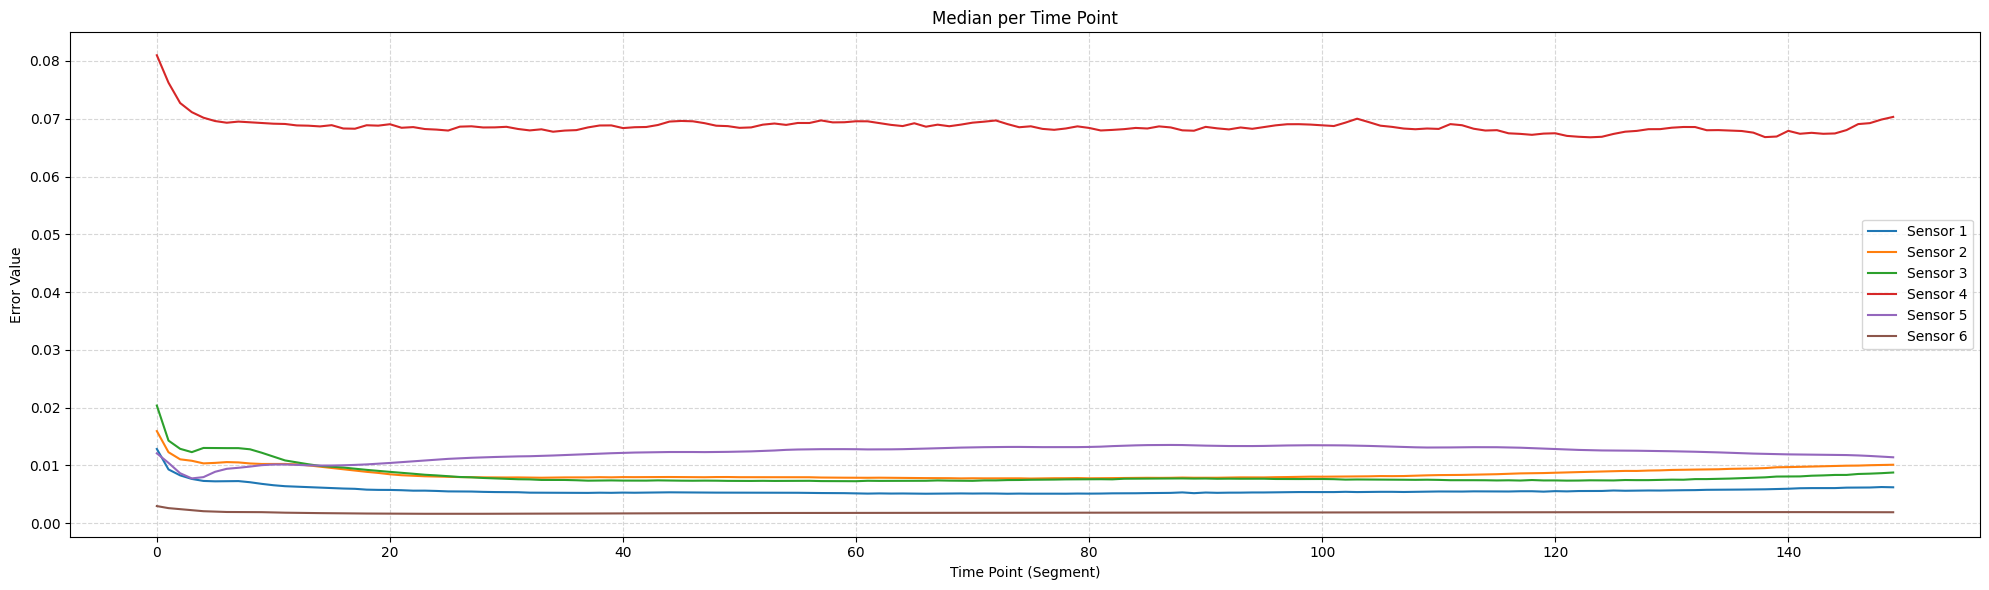

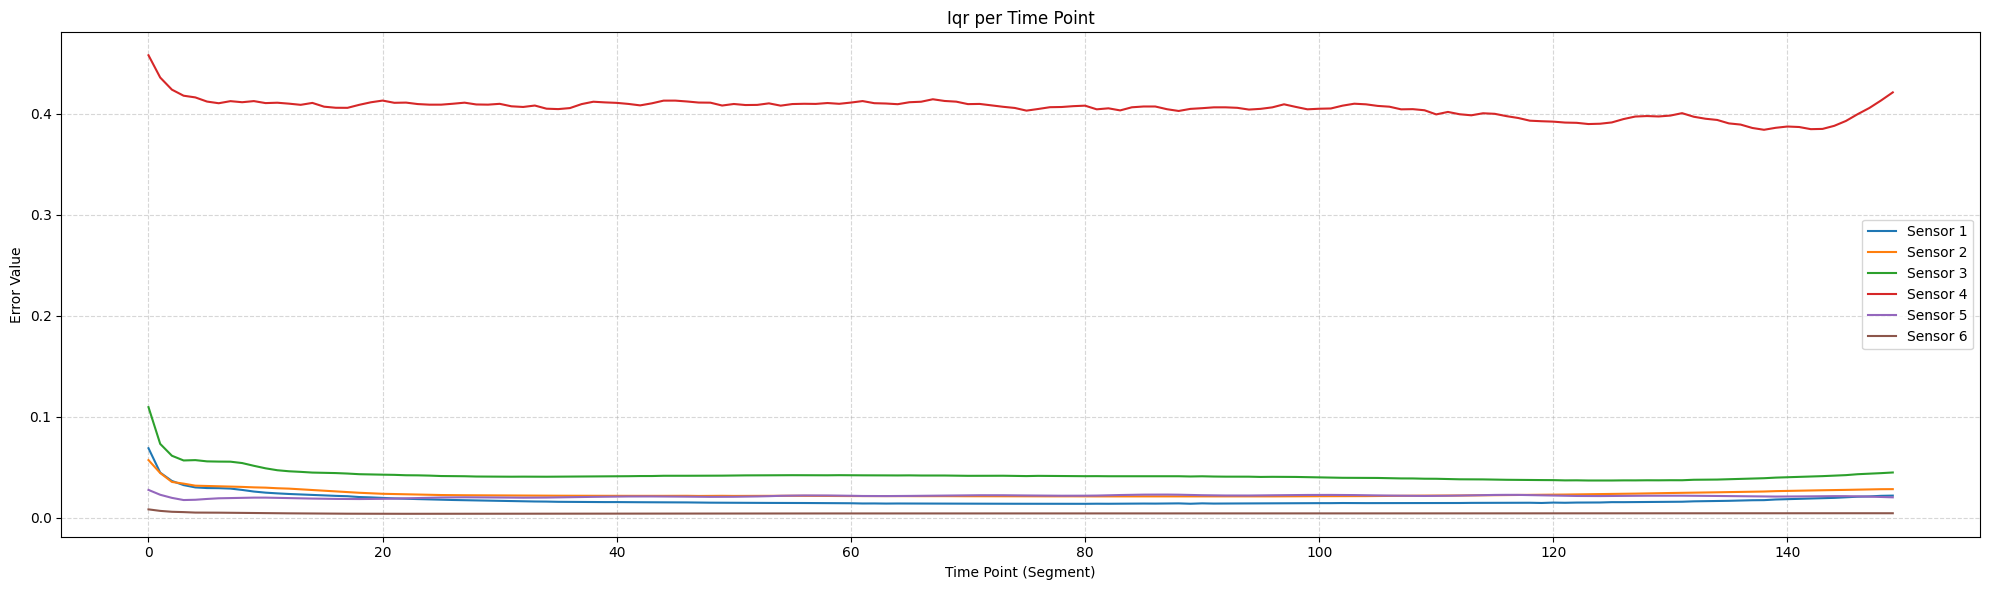

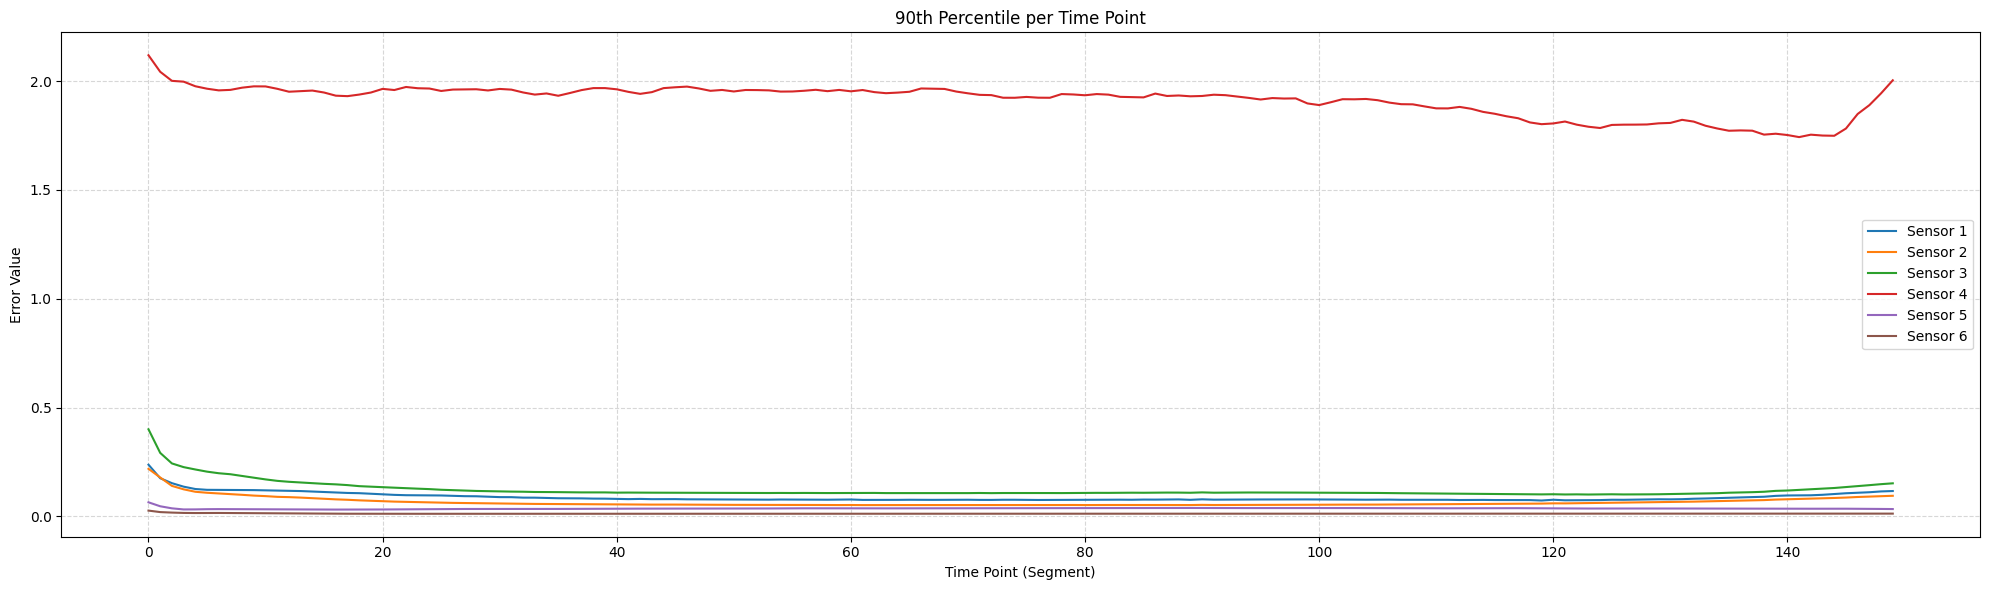

In [19]:
plot_error_metric_line(squared_error, sensors=None, metric='median')
plot_error_metric_line(squared_error, metric='iqr')
plot_error_metric_line(squared_error, metric='percentile', percentile=90)

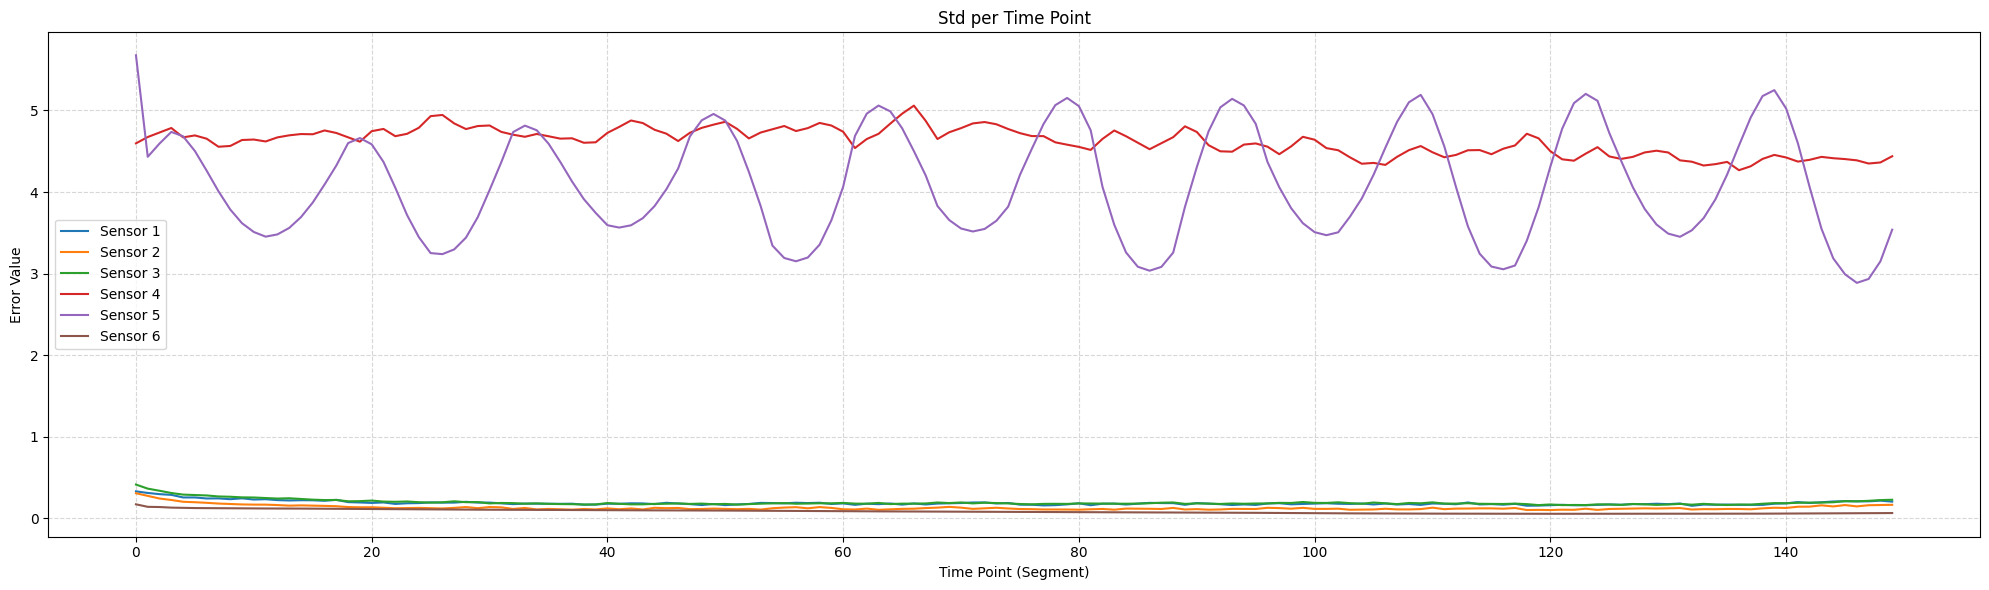

In [18]:
plot_error_metric_line(squared_error, metric='std')

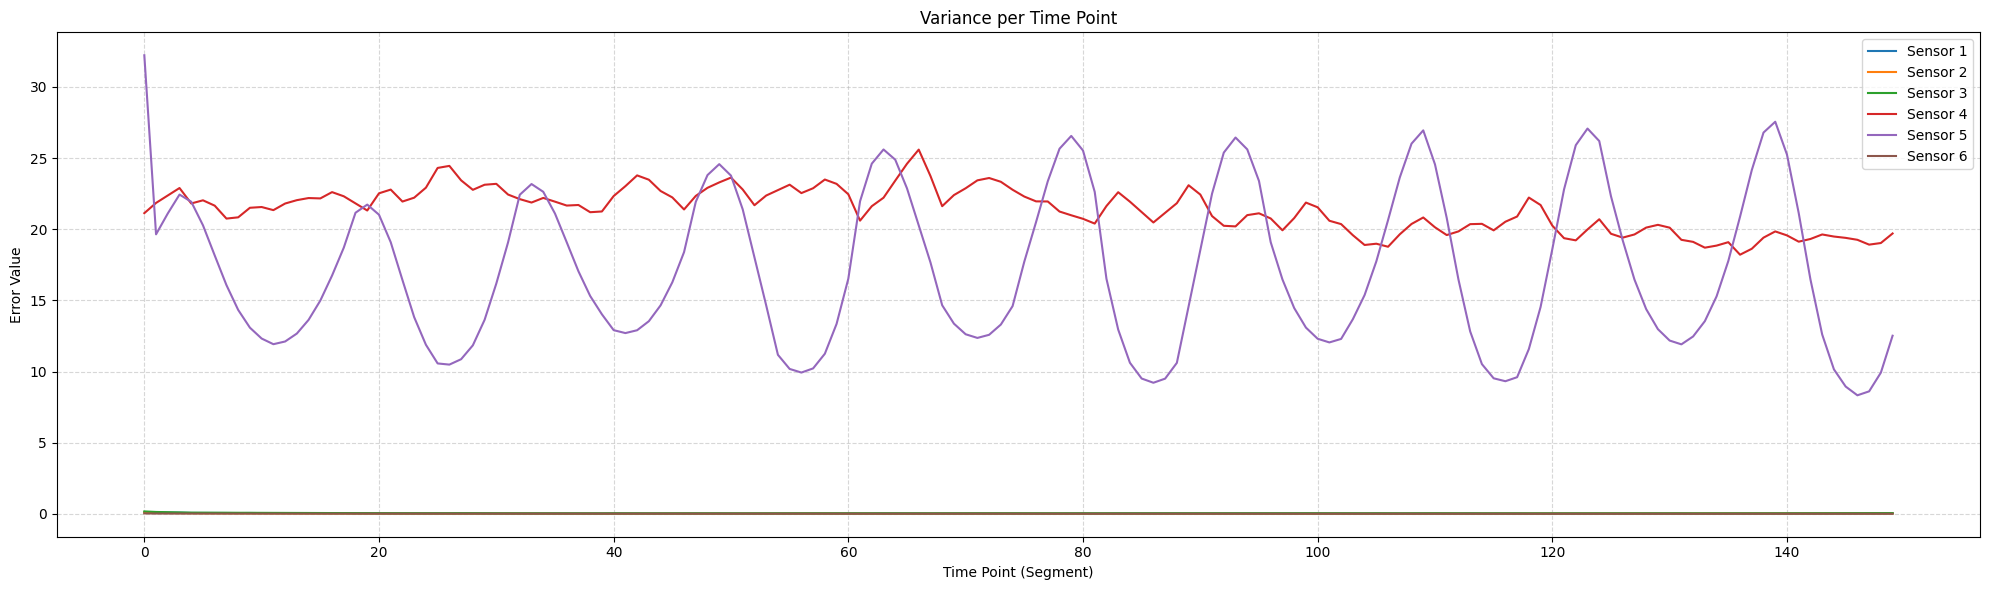

In [17]:
plot_error_metric_line(squared_error, metric='variance')

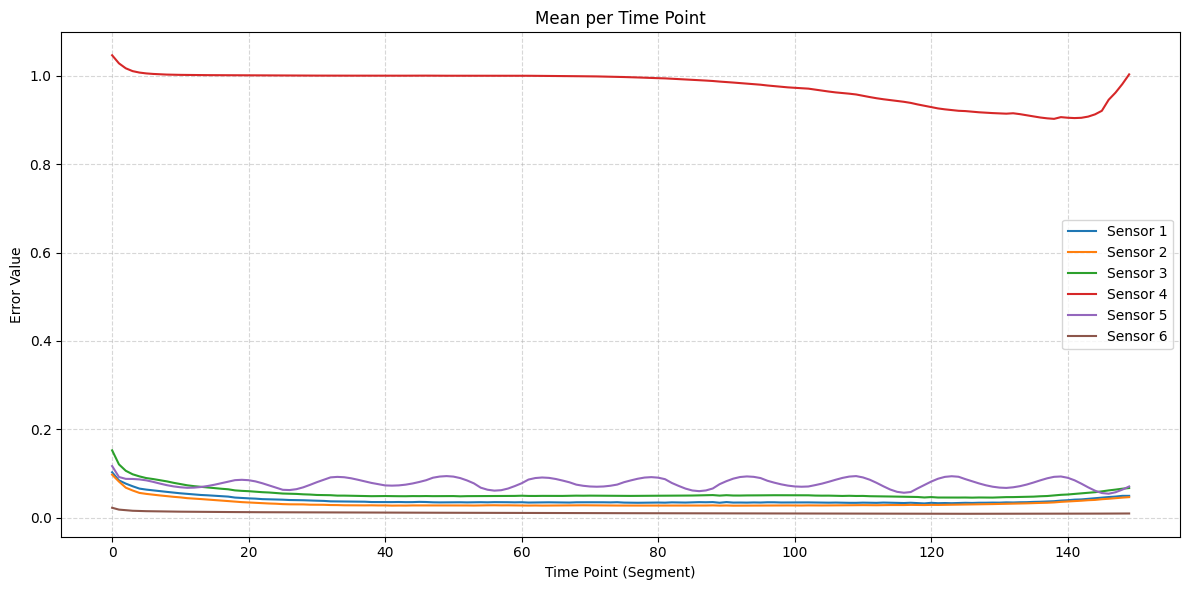

In [18]:
plot_error_metric_line(squared_error, metric='mean')


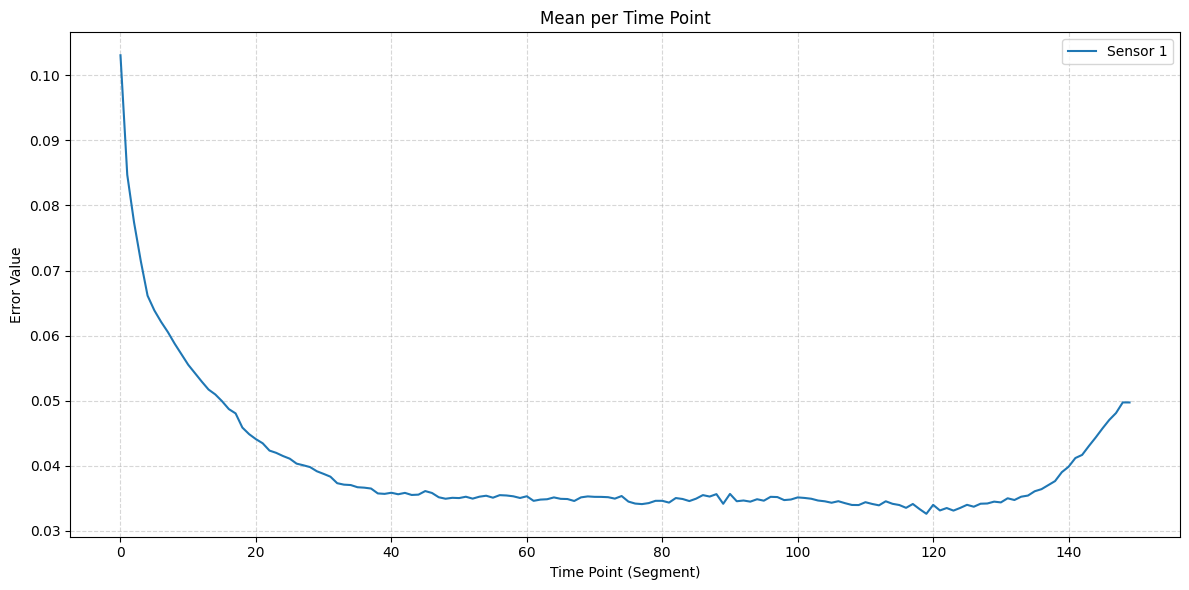

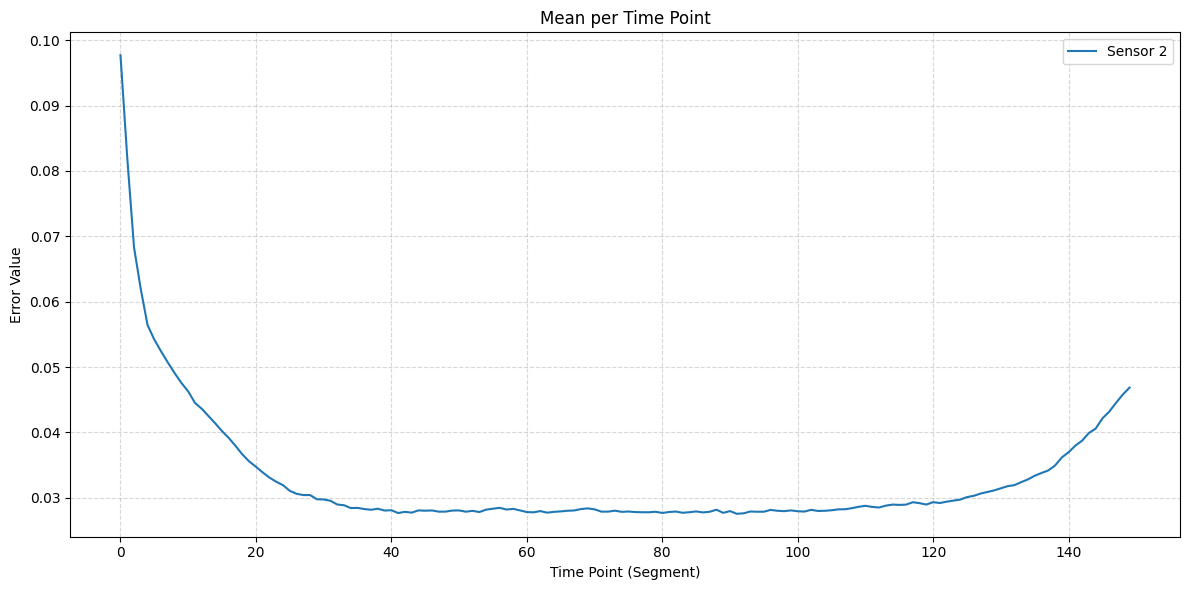

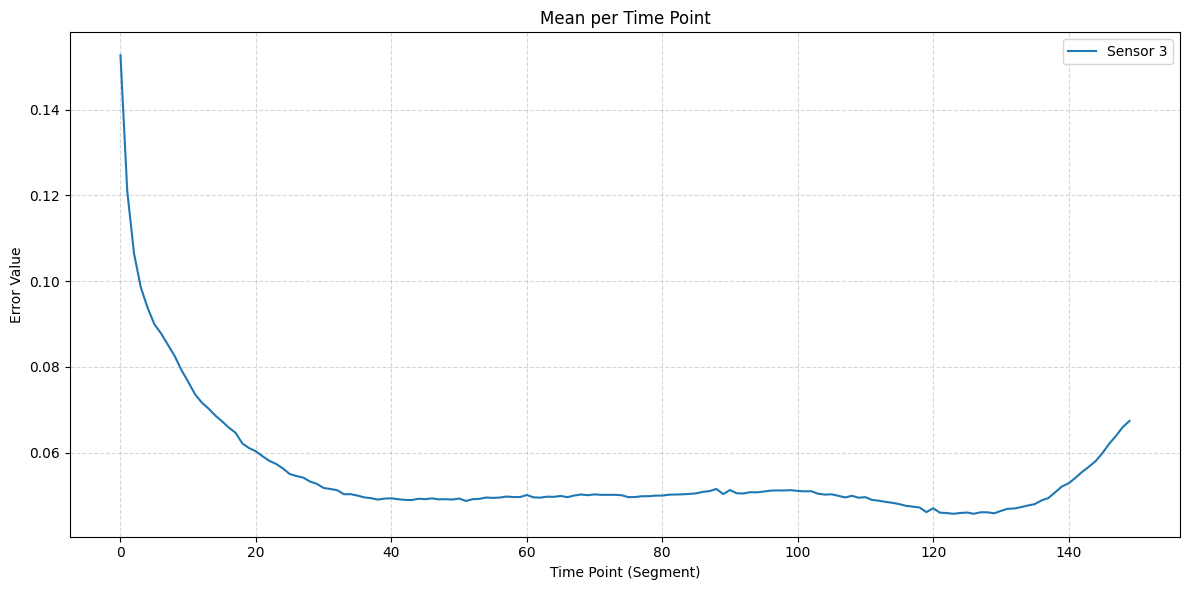

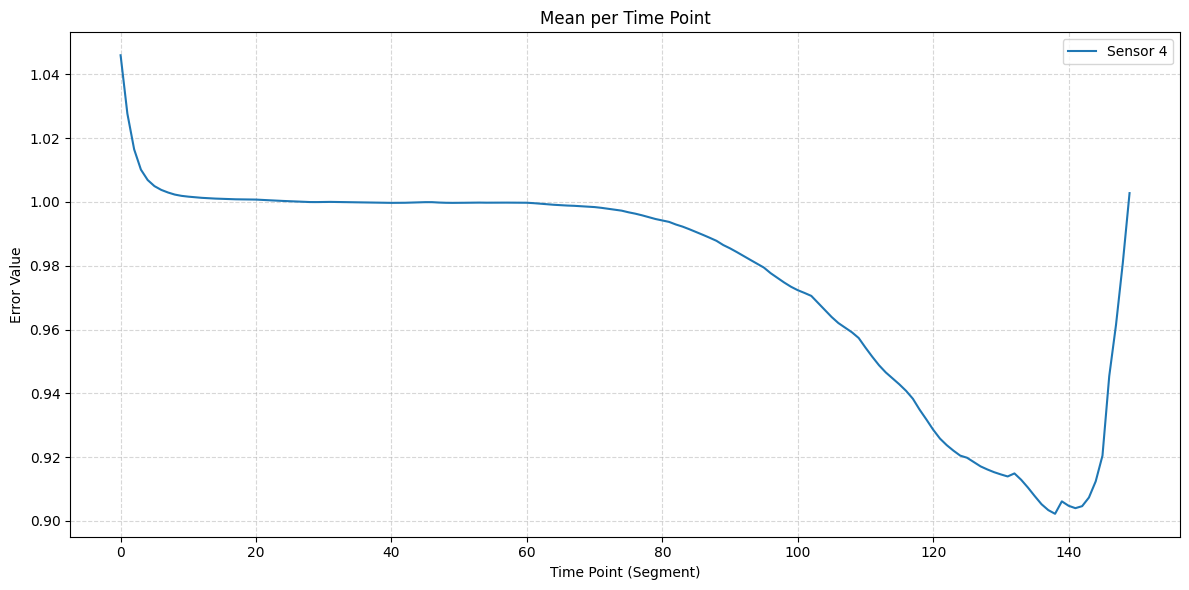

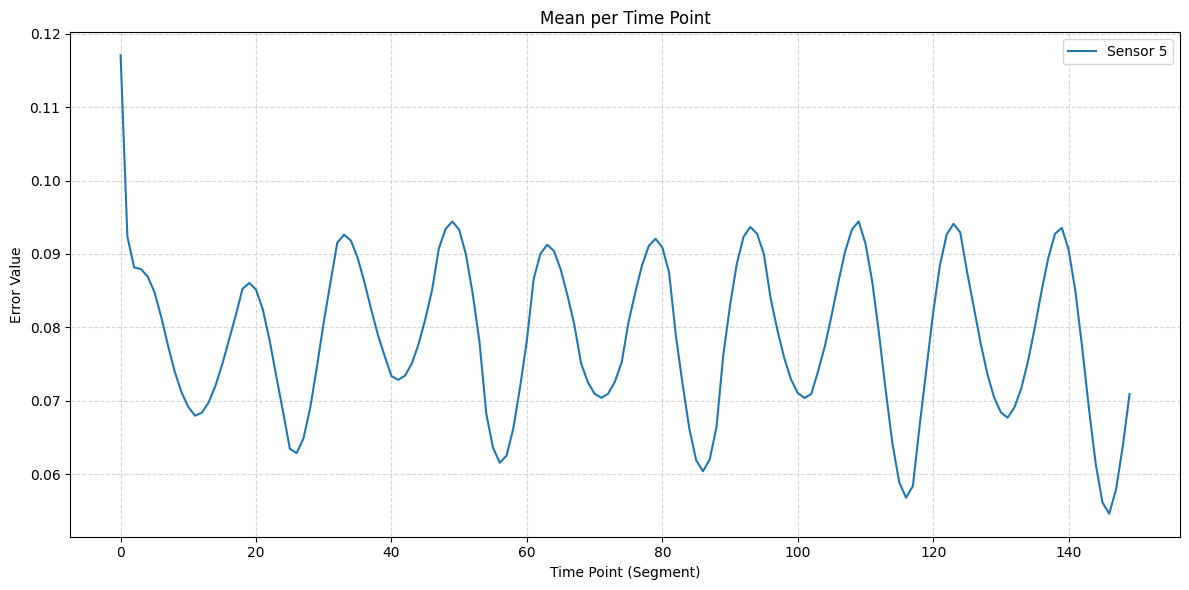

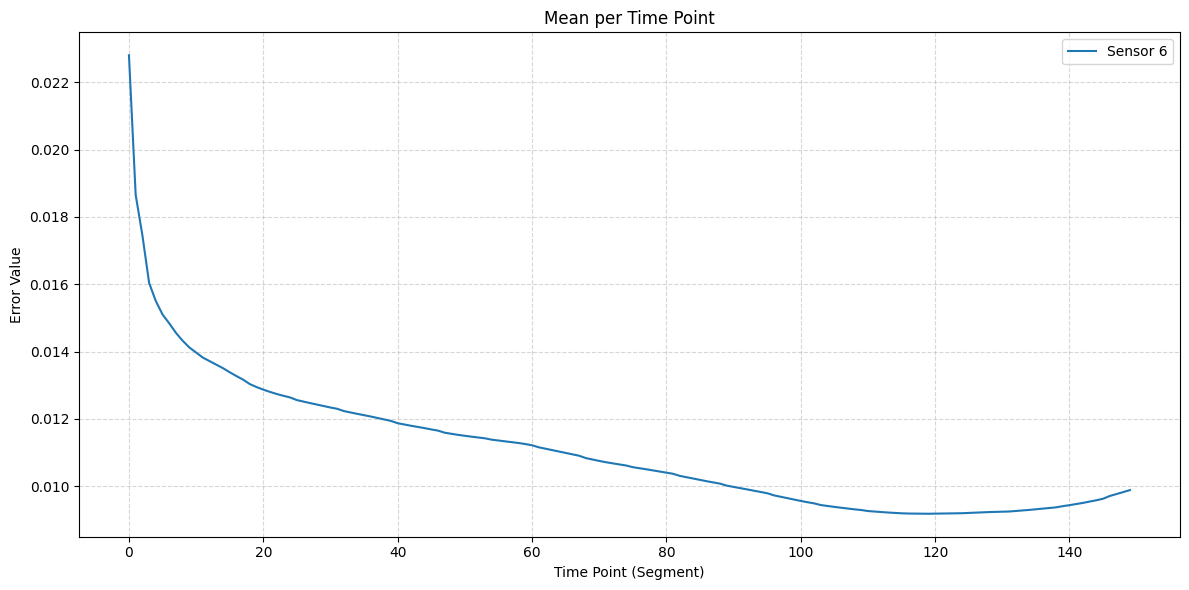

In [19]:
plot_error_metric_line(squared_error, metric='mean',sensors=0)
plot_error_metric_line(squared_error, metric='mean',sensors=1)
plot_error_metric_line(squared_error, metric='mean',sensors=2)
plot_error_metric_line(squared_error, metric='mean',sensors=3)
plot_error_metric_line(squared_error, metric='mean',sensors=4)
plot_error_metric_line(squared_error, metric='mean',sensors=5)

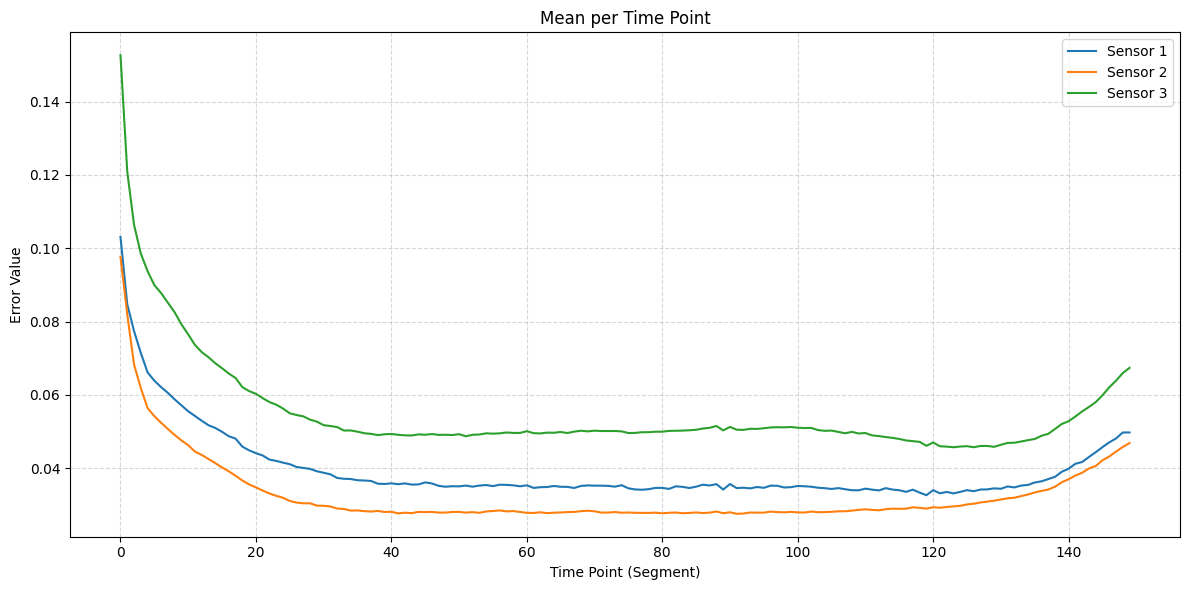

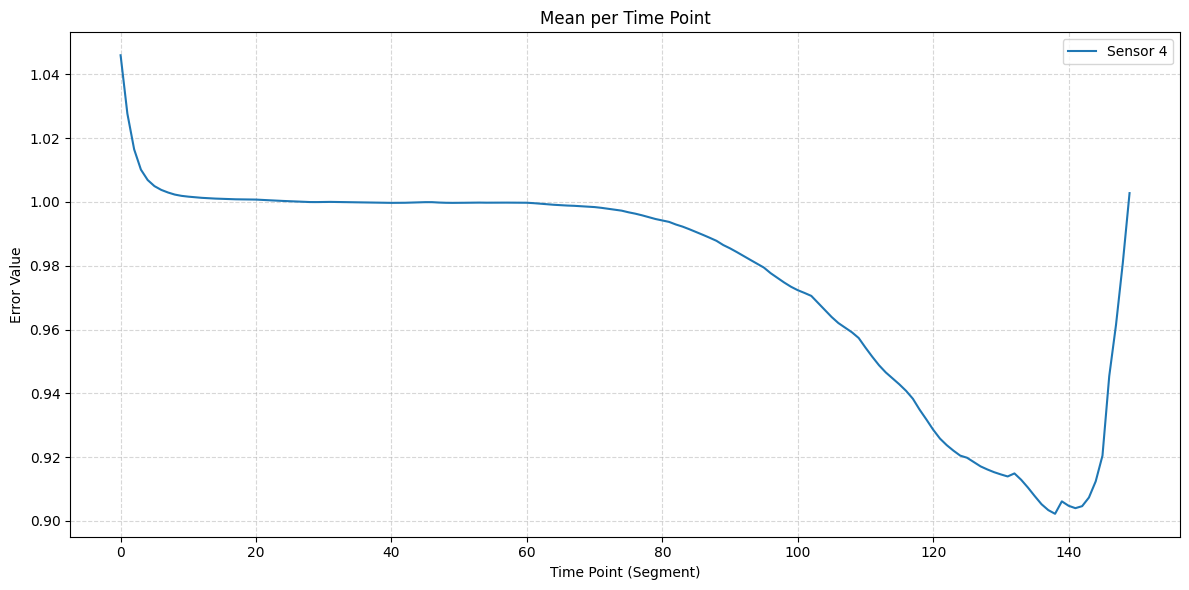

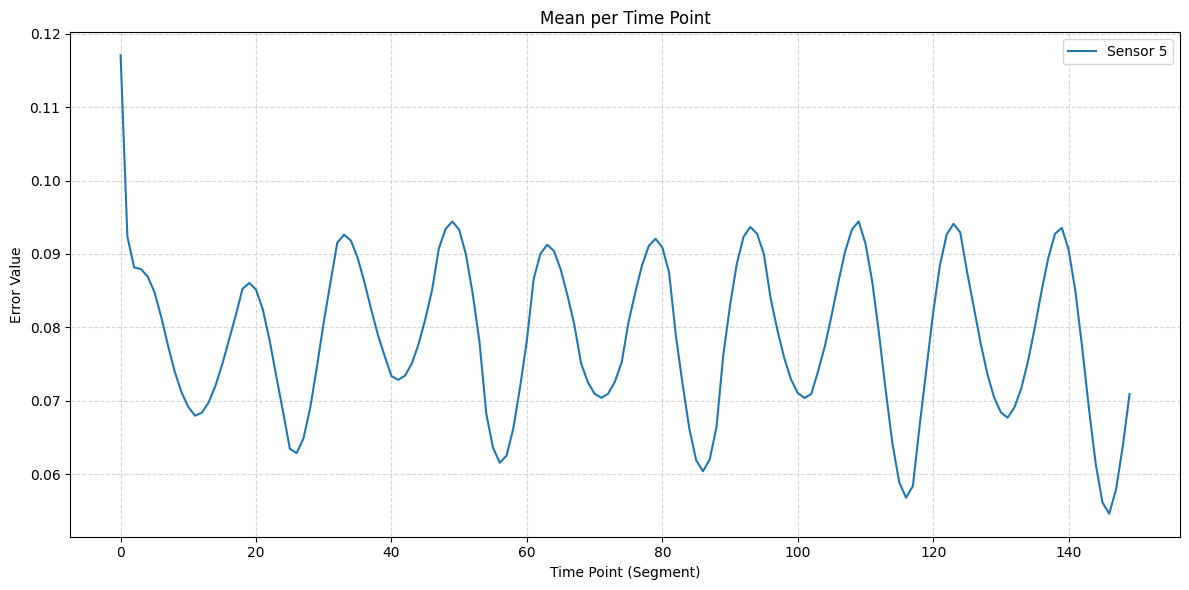

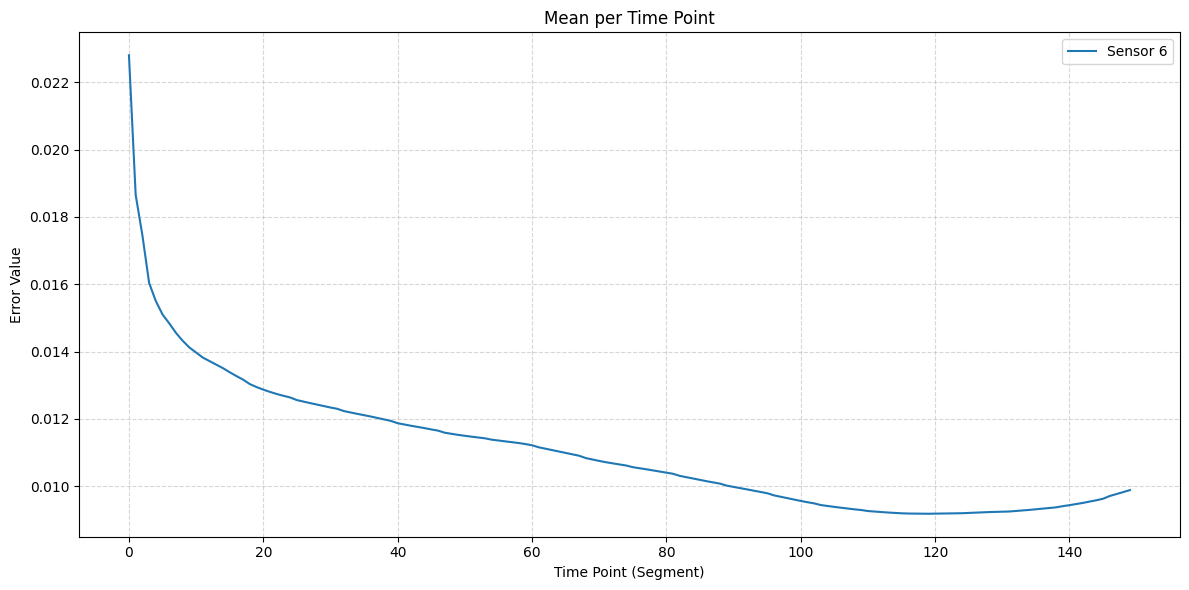

In [20]:
plot_error_metric_line(squared_error, metric='mean',sensors=[0,1,2])
plot_error_metric_line(squared_error, metric='mean',sensors=3)
plot_error_metric_line(squared_error, metric='mean',sensors=4)
plot_error_metric_line(squared_error, metric='mean',sensors=5)